In [1]:
import json
import time
import random
import re
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import string
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from utils import read_json

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')

In [ ]:
%%time

yelp_review= read_json('yelp-dataset/yelp_academic_dataset_review.json')

In [8]:
business = yelp_review.business_id.unique()
len(business)

150346

In [4]:
def sort_frequency(counter):
    freq_arr = sorted([(key, value) for key, value in counter.items()], key=lambda x: x[1])
    return freq_arr[::-1]
        

In [11]:
ps = PorterStemmer()
def get_frequency(corpus):
    tokens = []
    for text in corpus:
        # remove punctuation and lower all the characters
        tokens.extend(word_tokenize(re.sub(r"[^\w\s]", "", text.lower()))) 
        # tokens.extend(word_tokenize(text))
    stemmed_tokens = [ps.stem(w) for w in tokens]
    original_frequency = defaultdict(int)
    stemmed_frequency = defaultdict(int)
    for token in tokens:
        original_frequency[token] += 1
    for token in stemmed_tokens:
        stemmed_frequency[token] += 1
    original_frequency = sort_frequency(original_frequency)
    stemmed_frequency = sort_frequency(stemmed_frequency)
    plt.figure(figsize=(15, 8))
    plt.subplot(121)
    plt.plot([np.log(t[1]) for t in original_frequency])
    plt.title("Word frequency before stemming")
    plt.ylabel("logged frequency")
    plt.xlabel("word rank")
    plt.subplot(122)
    plt.plot([np.log(t[1]) for t in stemmed_frequency])
    plt.title("Word frequency after stemming")
    plt.ylabel("logged frequency")
    plt.xlabel("word rank")
    return original_frequency, stemmed_frequency

In [12]:
def get_topk(freq, k, ignore_words):
    topk = []
    i = 0
    while len(topk) < k:
        if freq[i][0] not in ignore_words:
            topk.append(freq[i])
        i += 1
    return topk

DcBLYSvOuWcNReolRVr12A 3217 reviews
Top 10 before stemming:  [('oysters', 4963), ('good', 1955), ('food', 1649), ('charbroiled', 1569), ('service', 1230), ('dragos', 1199), ('great', 1073), ('place', 1069), ('shrimp', 1058), ('lobster', 967)]
Top 10 after stemming:  [('oyster', 5669), ('good', 2030), ('food', 1669), ('order', 1633), ('charbroil', 1603), ('place', 1293), ('drago', 1263), ('servic', 1240), ('great', 1074), ('shrimp', 1072)]


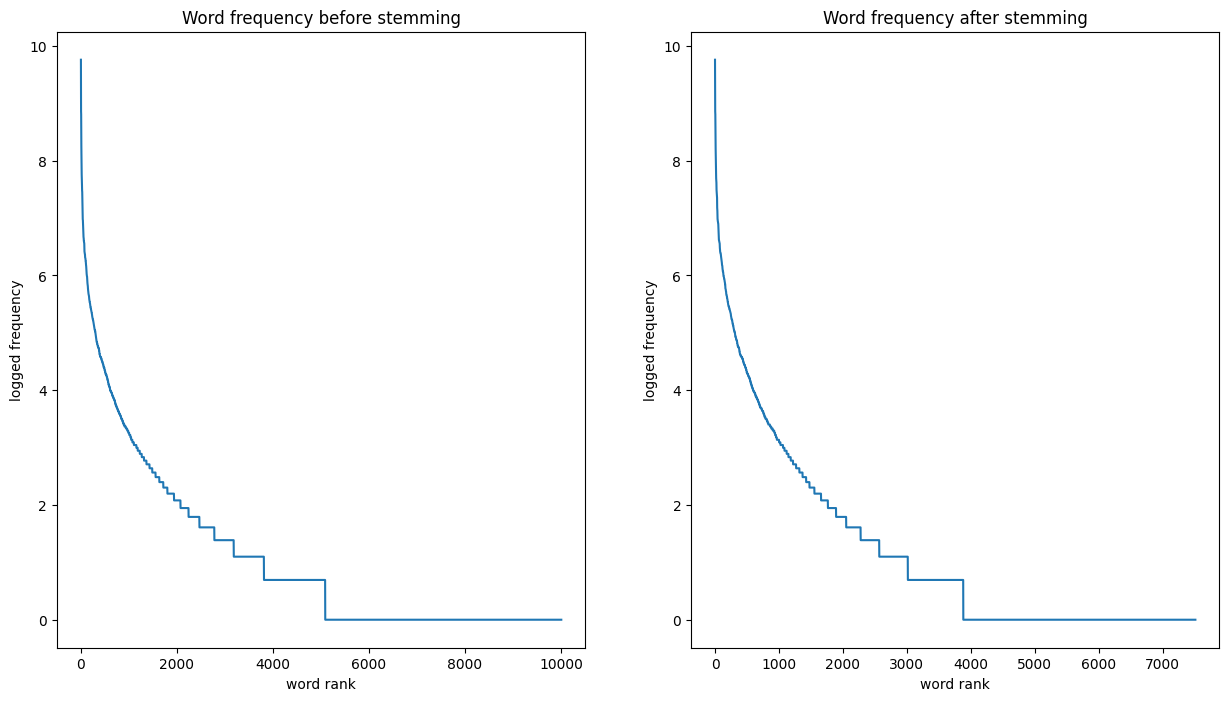

In [14]:
b1 = random.choice(business)
selected_reviews = yelp_review[yelp_review["business_id"] == b1]
print(b1, f"{len(selected_reviews)} reviews")
freq1, freq2 = get_frequency(selected_reviews["text"])
print(
    "Top 10 before stemming: ",
    get_topk(freq1, 10,  ignore_words=stopwords.words("english"))
)
print("Top 10 after stemming: ", 
      get_topk(freq2, 10, ignore_words=[ps.stem(w) for w in stopwords.words("english")])
)

ChlcxTEoWBQJXJ2Xb2vm5g 2450 reviews
Top 10 before stemming:  [('food', 1939), ('good', 1686), ('service', 1474), ('great', 1410), ('nola', 1213), ('restaurant', 1118), ('shrimp', 1114), ('chicken', 1105), ('one', 1005), ('new', 920)]
Top 10 after stemming:  [('food', 1954), ('good', 1705), ('restaur', 1505), ('servic', 1481), ('great', 1411), ('nola', 1298), ('order', 1164), ('shrimp', 1126), ('chicken', 1108), ('one', 1033)]


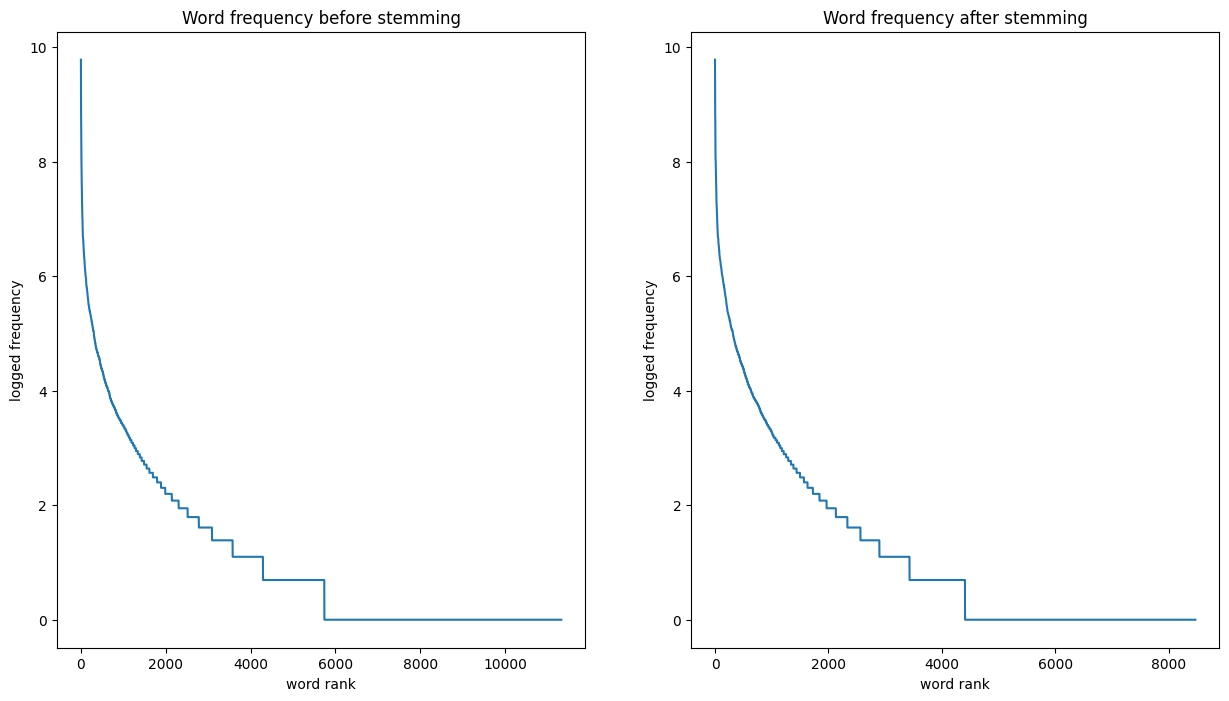

In [13]:
b2 = random.choice(business)
selected_reviews = yelp_review[yelp_review["business_id"] == b2]
print(b2, f"{len(selected_reviews)} reviews")
freq1, freq2 = get_frequency(selected_reviews["text"])
print(
    "Top 10 before stemming: ",
    get_topk(freq1, 10,  ignore_words=stopwords.words("english"))
)
print("Top 10 after stemming: ", 
      get_topk(freq2, 10, ignore_words=[ps.stem(w) for w in stopwords.words("english")])
)